In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanishaj225/loancsv")

print("Path to dataset files:", path)


100%|██████████| 7.79k/7.79k [00:00<00:00, 4.38MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tanishaj225/loancsv/versions/1


In [3]:

import os

path = "/root/.cache/kagglehub/datasets/tanishaj225/loancsv/versions/1"
files = os.listdir(path)
print(files)

['loan.csv']


In [4]:


file_name = "loan.csv"
file_path = os.path.join(path, file_name)

import pandas as pd
data = pd.read_csv(file_path)
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
df = pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


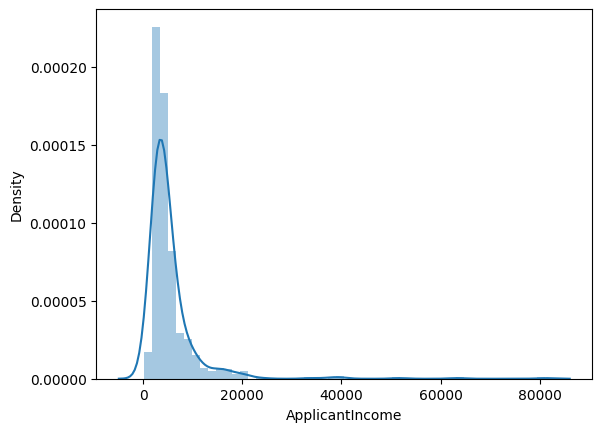

In [10]:
sns.distplot(df['ApplicantIncome'])
plt.show()

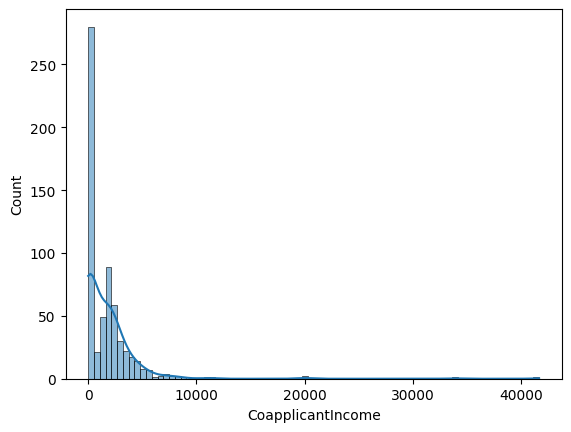

In [12]:
sns.histplot(df['CoapplicantIncome'], kde = True)
plt.show()

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['ApplicantIncome', 'CoapplicantIncome']])

StandardScaler()

In [17]:
df[['ApplicantIncome_ss', 'CoapplicantIncome_ss']] = scaler.transform(df[['ApplicantIncome', 'CoapplicantIncome']])


In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,-0.554487
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,-0.038732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,-0.554487
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.251980
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,-0.554487


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss,CoapplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18,4.050325e-17
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01,-5.544873e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01,-5.544873e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01,-1.480047e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02,2.312023e-01
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01,1.369617e+01


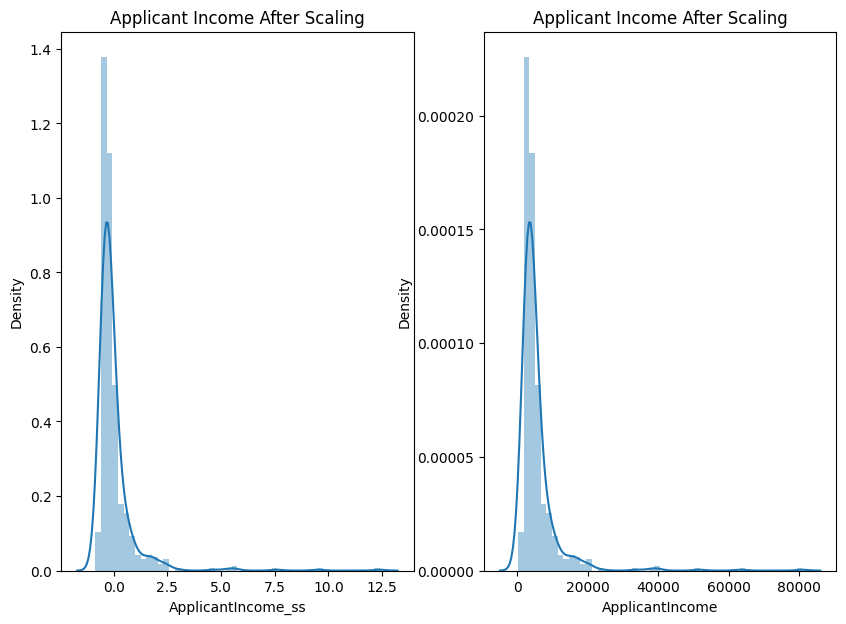

In [27]:
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.title('Applicant Income After Scaling')
sns.distplot(df['ApplicantIncome_ss'])

plt.subplot(1,2,2)
plt.title('Applicant Income After Scaling')
sns.distplot(df['ApplicantIncome'])
plt.show()
